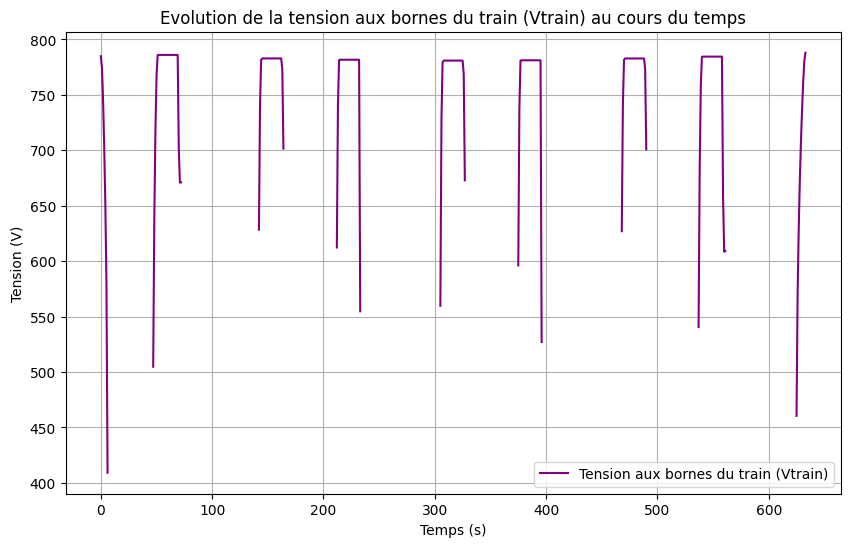

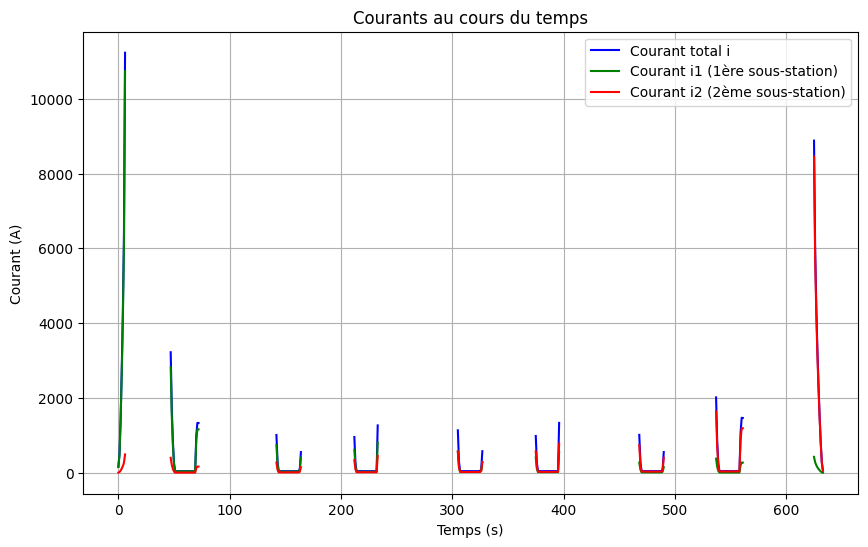

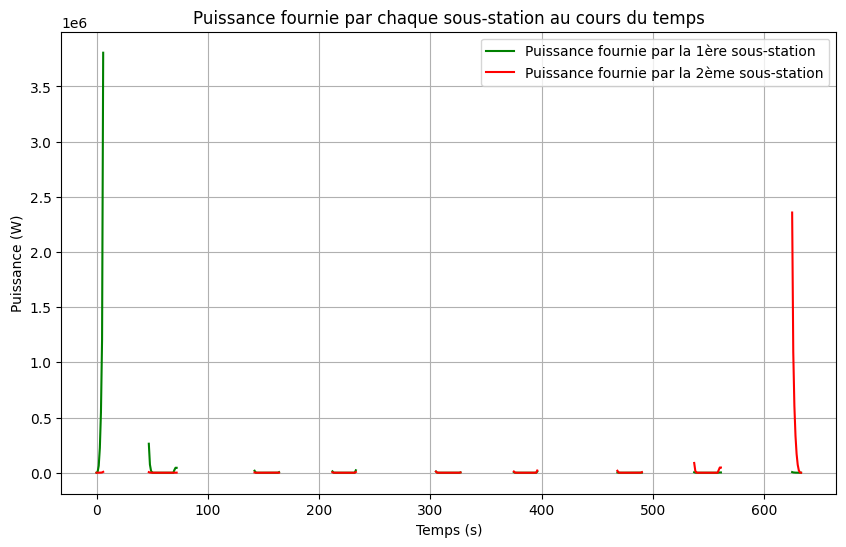

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Données du problème
Vsst = 790  
Rsst = 33e-3  
RLAC_per_m = 131e-6  
Rrail_per_m = 18e-6  

# Charger les données de la marche du train
data = np.loadtxt('marche_train.txt')  
temps = data[:, 0]
position_x = data[:, 1] 
# Fonction pour calculer RLAC et Rrail
def calculer_RLAC(x):
    return RLAC_per_m * x

def calculer_Rrail(x):
    return Rrail_per_m * x

# Fonction pour calculer Req
def calculer_Req(x):
    RLAC1 = calculer_RLAC(x)
    Rrail1 = calculer_Rrail(x)
    RLAC2 = calculer_RLAC(5000 - x)  # Longueur totale de 5 km
    Rrail2 = calculer_Rrail(5000 - x)
    R1 = RLAC1 + Rrail1 + Rsst
    R2 = RLAC2 + Rrail2 + Rsst
    return ( (R1*R2)/(R1 + R2 ) )

# Fonction pour calculer la puissance mécanique
def calculer_puissance_mecanique(temps, position_x):
    vitesse = np.gradient(position_x, temps)
    acceleration = np.gradient(vitesse, temps)

    # Paramètres pour le calcul de la force résistive
    M = 70000 
    Ao = 780
    A1 = 6.4
    Bo = 0
    B1 = 0.14
    Co = 0.3634
    C1 = 0

    # Force résistive
    Fresistive = (Ao + A1 * M) + (Bo + B1 * M) * vitesse + (Co + C1 * M) * vitesse**2

    # Force motrice
    Fmotrice = M * acceleration + M * 9.81 * np.sin(0) + Fresistive  # En supposant une pente nulle pour le moment

    Pmechanique = Fmotrice * vitesse
    return Pmechanique

Pmechanique = calculer_puissance_mecanique(temps, position_x)

# Calcul de la puissance électrique consommée
Ptrain = Pmechanique / 0.80 + 35000  # Rendement de 80% et consommation constante de 35 kW

# 1. Calcul de Vtrain
Vtrain = []
for idx in range(len(temps)):
    x = position_x[idx]
    Req = calculer_Req(x)
    P = Ptrain[idx]
    delta = Vsst**2 - 4 * Req * P
    if delta >= 0:
        V = 0.5 * (Vsst + np.sqrt(delta))
        Vtrain.append(V)
    else:
        Vtrain.append(np.nan)

# 2. Calcul des courants et des puissances (en dehors de la boucle de Vtrain)
i = []
i1 = []
i2 = []
P1 = []
P2 = []

for idx in range(len(temps)):
    x = position_x[idx]
    Req = calculer_Req(x)
    P = Ptrain[idx]
    V = Vtrain[idx]
    i_value = (Vsst - V) / Req
    i.append(i_value)
    # Calcul des courants i1 et i2
    i1_value = (Vsst - V) / (Rsst + calculer_RLAC(x) + calculer_Rrail(x))
    i2_value = (Vsst - V) / (Rsst + calculer_RLAC(5000 - x) + calculer_Rrail(5000 - x))
    P1_value = (Rsst ) * i1_value**2 
    P2_value = (Rsst ) * i2_value**2 
    i1.append(i1_value)
    i2.append(i2_value)
    P1.append(P1_value)
    P2.append(P2_value)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, Vtrain, label='Tension aux bornes du train (Vtrain)', color='purple')
plt.title('Evolution de la tension aux bornes du train (Vtrain) au cours du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Tension (V)')
plt.legend()
plt.grid(True)
plt.show()

# Tracer les courants (i, i1, i2)
plt.figure(figsize=(10, 6))
plt.plot(temps, i, label='Courant total i', color='blue')
plt.plot(temps, i1, label='Courant i1 (1ère sous-station)', color='green')
plt.plot(temps, i2, label='Courant i2 (2ème sous-station)', color='red')
plt.title('Courants au cours du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Courant (A)')
plt.legend()
plt.grid(True)
plt.show()

# Tracer les puissances (P1 et P2)
plt.figure(figsize=(10, 6))
plt.plot(temps, P1, label='Puissance fournie par la 1ère sous-station', color='green')
plt.plot(temps, P2, label='Puissance fournie par la 2ème sous-station', color='red')
plt.title('Puissance fournie par chaque sous-station au cours du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
Vtrain

[nan,
 nan,
 nan,
 nan,
 np.float64(379046.8645319834),
 np.float64(1240500.684630062),
 np.float64(2503273.7110816864),
 np.float64(4300348.448372518),
 np.float64(6724418.977541101),
 np.float64(9217088.941713788),
 np.float64(9889138.850671591),
 np.float64(8853895.905757358),
 np.float64(9972090.4184699),
 np.float64(12575416.290038357),
 np.float64(14594734.921056533),
 np.float64(16568309.076042635),
 np.float64(20373863.82174918),
 np.float64(26289954.323216956),
 np.float64(32778937.698481385),
 np.float64(38495302.09579136),
 np.float64(43291577.23425445),
 np.float64(47583162.15777724),
 np.float64(51866750.77108397),
 np.float64(56178210.8627051),
 np.float64(60508247.508349605),
 np.float64(64849592.802323595),
 np.float64(69197890.23063979),
 np.float64(73549764.34014532),
 np.float64(77903015.79020168),
 np.float64(82257079.10811874),
 np.float64(86611403.03402373),
 np.float64(90965675.93051976),
 np.float64(95319822.25507568),
 np.float64(99673181.35596853),
 np.float64

In [4]:
position_x

array([0.00000000e+00, 1.53999999e+02, 1.11940014e+03, 3.23640037e+03,
       6.51340151e+03, 1.09504042e+04, 1.65474091e+04, 2.33044167e+04,
       3.12214241e+04, 4.02984238e+04, 5.04814148e+04, 6.03124084e+04,
       6.91433945e+04, 7.74739075e+04, 8.58099365e+04, 9.41459656e+04,
       1.02493980e+05, 1.11223961e+05, 1.20980934e+05, 1.31895172e+05,
       1.43809036e+05, 1.56398071e+05, 1.69431519e+05, 1.82757385e+05,
       1.96275742e+05, 2.09920761e+05, 2.23649124e+05, 2.37432373e+05,
       2.51251770e+05, 2.65094910e+05, 2.78953705e+05, 2.92822784e+05,
       3.06698639e+05, 3.20578979e+05, 3.34462219e+05, 3.48347351e+05,
       3.62233795e+05, 3.75820862e+05, 3.88432922e+05, 4.00045044e+05,
       4.10657104e+05, 4.20269196e+05, 4.28881287e+05, 4.36493317e+05,
       4.43105408e+05, 4.48717438e+05, 4.53329529e+05, 4.56941589e+05,
       4.59553619e+05, 4.61165710e+05, 4.61777740e+05, 4.61783325e+05,
       4.61783325e+05, 4.61783325e+05, 4.61783325e+05, 4.61783325e+05,
      